# Review

### 다중공선성
$X1, X2 → Y$

$X1, X2$ 독립변수 사이에 서로 예측이 가능할 때
- 해결책: 둘 중 하나를 제거

- 진단방법: 독립변수끼리 회귀

$R² >= 0.9$ 이면 문제

$VIF = 1/(1-R²)$

R²|VIF
-|-
0|1
0.5|2
0.9|10
1| 무한대

### 통계적으로 통제

$X1$ 섭취량
$X2$ 커피에 관심
$Y$ 맛보기 능력

관심을 통계적으로 통제했을 때(관심과 섭취량 둘 다 회귀분석에 집어넣는다) 

→ 섭취량은 맛보기에 영향을 주지 않는다

### Cross Validation
Data 를 Train set, Test set 으로 나눠서 
- Train set: Parameter 추정
- Test set: 예측력 검증

# Survival Analysis
- 특정 사건(죽음, 회복, 고장, 가입, 이탈 등)까지 걸리는 기간을 분석한다
- 우리가 관심있는 단 한 번의 사건

## Censoring
- 조사 기간 밖에서 죽는 경우
- Right Censoring: 조사 기간 이후 
- Left Censoring: 조사 기간 이전, 조사에는 포함
- Left Truncation: 조사 이전에 죽어서 조사에 포함 안되는 경우
- Interval Censoring: 주기적으로 관찰하는 경우 두 관찰 시점 사이 언젠가

분석할 때 언제나 Right Censoring 을 감안해야 한다

## Survival Function 생존함수
$S(t) = P(T > t)$
- 시점 $t$ 까지 살아남을 확률
- $T$: 죽는 시점

#### 평균이 아니라 커브가 어떤 모양인지가 중요하다
- 일정하게 감소
- 초기에 많이 감소하다가 무뎌진다 ex. Netflix
- 초기에는 감소하지 않다가 급격히 감소 ex. 통신사

#### 생존함수 추정
- 전 기간을 관찰할 수 없으니 이후의 추세를 추정한다
- 커브에서 언제 어떻게 감소하는지 보고 그에 맞는 정책 세운다

## 실습) 생존함수를 그리고 커브를 개선하기 위한 액션
질병의 경우 (죽는 경우, 낫는 경우) 두가지로 커브에서 빠져나가는 경우 생존함수와 맞지 않다

In [2]:
!pip install lifelines

  Created wheel for autograd: filename=autograd-1.3-cp37-none-any.whl size=47995 sha256=6efeb83cc7ec838e5354954db51a8acf0065b2fcdac8db1cbab2c113a5e3cb50
  Stored in directory: C:\Users\Minju\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
Successfully built autograd


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

In [5]:
cancer = pd.read_csv('cancer.csv', index_col=0)

cancer.sample()
# delta: 그 시점에 죽은 사람 숫자

,type,time,delta
49,1,150,0


## Kaplan-Meier Estimate
$S^(t) = Π(ti <= t) (ni - di)/ni$

Π: product 곱

ti: i 번째 시점
ni: i 번째 시점까지 살아남은 수
di: i 번째 시점에 죽은 수

In [7]:
from lifelines import KaplanMeierFitter

In [20]:
cancer.query('delta == 0') # delta == 0 인 경우, 즉, 그 시점에 추적이 안 된 사례

,type,time,delta
32,1,61,0
33,1,74,0
34,1,79,0
35,1,80,0
36,1,81,0
37,1,87,0
38,1,87,0
39,1,88,0
40,1,89,0
41,1,93,0


In [10]:
cancer1 = cancer.query('type == 1')

In [16]:
kmf = KaplanMeierFitter()

In [17]:
kmf.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1')

<lifelines.KaplanMeierFitter: fitted with 52 total observations, 21 right-censored observations>

In [14]:
from matplotlib import pyplot

In [18]:
kmf.survival_function_

,type 1
timeline,
0.0,1.000000
1.0,0.980769
3.0,0.942308
4.0,0.923077
10.0,0.903846
13.0,0.865385
16.0,0.826923
24.0,0.807692
26.0,0.788462


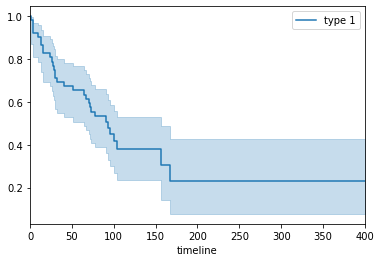

In [19]:
kmf.plot_survival_function()

#### (8 개월 이후에 병원에 안나오는 사람) 같은 사람들을 적당히 추정해서 그래프에 넣어준다
- 병원에 계속 나온 사람과 비슷하게 완치됐을 것이라고 가정
- 만약 8 개월차에 죽어서 병원에 안 나온거라면 왜곡이 발생

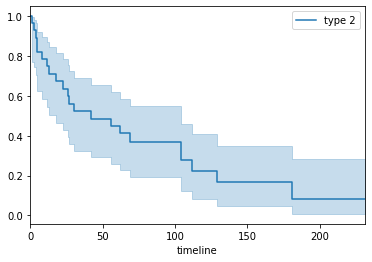

In [22]:
cancer2 = cancer.query('type == 2')
kmf2 = KaplanMeierFitter()
kmf2.fit(cancer2['time'], event_observed=cancer2['delta'], label='type 2')
kmf2.plot()

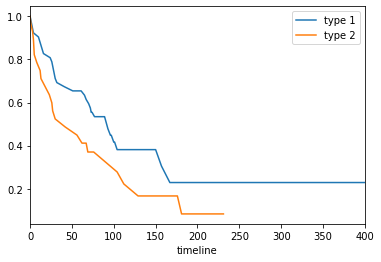

In [24]:
# 같은 canvas 에 그리기

ax = kmf1.survival_function_.plot()
kmf2.survival_function_.plot(ax=ax)

### Logrank Test
신뢰구간을 반영해도 type 2 가 더 가파르게 감소하는지 확인하기

In [26]:
from lifelines.statistics import logrank_test

In [29]:
summary = logrank_test(cancer1['time'], cancer2['time'], cancer1['delta'], cancer2['delta'], alpha=.95)

summary.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           2.79 0.09      3.40


#### p value < 0.05 여야 차이가 난다고 할 수 있다.
p value = 0.09 이므로 95 % 신뢰구간 오차범위 내에 있다

### Hazard Function 위험함수
- 순간 순간 얼마나 위험한지
- 시점 t 에 죽을 확률
- 위험함수는 시점 t 에 죽을 확률 
> cf. 생존함수는 시점 t 까지 생존할 확률

$S(t) = .5$ 

- t 까지 50 % 가 살아남는다

$h(t) = .5$ 

- 시점 t 에 그 때까지 살아있던 사람 중에 50 % 가 죽는다

### Cumulative Hazard Function 누적 위험함수
- 시점 0 부터 시점 t 까지 위험함수의 적분(=합계)
- 위험함수 = 시점 t 에서 누적위험함수의 변화량(미분값)
- 생존함수 $S(t) = exp(-H(t))$

#### Hazard Function vs Cumulative Hazard Function
- 위험함수는 시점 t 의 순간적인 변화이기 때문에 추정이 어렵다
- 누적 위험함수는 해석이 어렵지만 긴 시점의 누적된 양이므로 상대적으로 추정이 쉽다

### Nelson-Aalen Estimate
- 누적위험함수 H(t) 의 추정치

H(t) = 합ti<=t di/ni

- ti: i 번째 시점
- ni: i 번째 시점까지 살아남은 수
- di: i 번째 시점에 죽은 수

In [34]:
from lifelines import NelsonAalenFitter

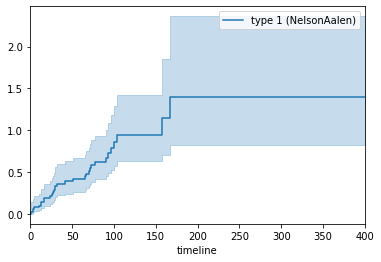

In [39]:
naf1 = NelsonAalenFitter()

naf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (NelsonAalen)')

naf1.plot()

### Exponential Model 지수 모형 
$H(t) = t/λ$
- 한가지 파라미터 $λ$ 로 누적위험함수를 나타낸다 
- 매 시점마다 1/λ 의 확률로 일정하게 죽는다고 가정한다
> 그래프가 매끄럽다. 일정한 확률로 가정했기 때문에

In [40]:
from lifelines import ExponentialFitter

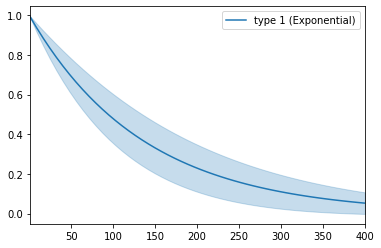

In [42]:
ef1 = ExponentialFitter()

ef1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Exponential)')

ef1.plot_survival_function()

In [43]:
ef1.log_likelihood_

-183.24816317243193

In [44]:
2 * 1 - 2 * wf1.log_likelihood_ # AIC 작을수록 좋다

366.9356548843635

### Weibull Model 베이불 모델
지수모형의 확장

In [30]:
from lifelines import WeibullFitter

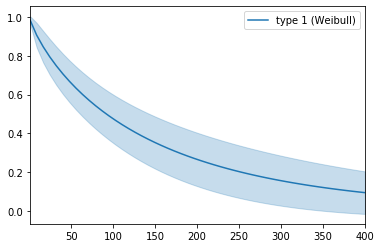

In [48]:
wf1 = WeibullFitter()

wf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Weibull)')

wf1.plot_survival_function() # Weibull 에서는 plot 하면 누적위험함수 곡선

In [49]:
2 * 2 - 2 * wf1.log_likelihood_ # AIC

368.9356548843635

### 아래 처럼 겹쳐서 보는 것 추천

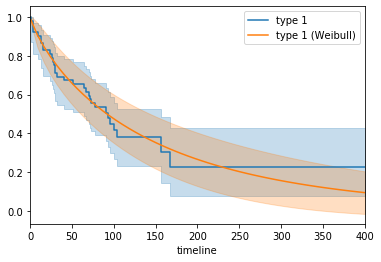

In [46]:
ax = kmf1.plot_survival_function()
wf1.plot_survival_function(ax=ax)

## Survival Regression
- 위험을 종속변수로 회귀분석

### Cox Model 콕스 모형
- 생존분석과 회귀분석을 합친 것
- 어떤 변수가 있으면 빨리 떨어지고, 천천히 떨어지는지

### Hazard Ratio 위험비
- 위험이 증가하는 비율
- 독립변수 x 의 계수가 0.09 인 경우
> exp(0.09) = 1.10
>
> x 가 1 증가할 때마다 위험이 1.10 배씩 증가
- 콕스 모형의 주요 가정: 위험은 시간에 따라 변하지만, 위험비는 일정하다

In [50]:
# 범죄자가 출소 후 다시 잡혀오는 것
from lifelines.datasets import load_rossi

In [51]:
rossi = load_rossi()

rossi.sample()

,week,arrest,fin,age,race,wexp,mar,paro,prio
110,52,0,0,20,1,0,0,1,6


- fin: 경제적 지원
- age: 나이
- race: 인종
- wexp: 직업 경험
- mar: 결혼
- paro: 가석방
- prio: 전과

In [53]:
from lifelines import CoxPHFitter

In [54]:
cph = CoxPHFitter()

cph.fit(rossi, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2019-10-07 06:27:32 UTC

---
       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
fin   -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age   -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race   0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp  -0.15       0.86       0.21            -0.57             0.27    

#### coef 해석

> marr coef 0.65

: marr == 0 (미혼)보다 marr == 1(기혼) 이 위험률이 0.65 배 낮아진다

> race coef 1.37

: race == 0 보다 race == 1 이 위험률이 1.37 배 높아진다

#### coef lower upper 1보다 큰 쪽에 둘 다 있거나, 1보다 작은 쪽에 둘 다 있어야 한다

#### p value 해석
- fin, age, prio 에 따라서만 차이 있다

### 해석의 철학적 차이

- p 값을 기준으로 먼저 변수를 제거한다

→ Fisher 식 논리: 확실하지 않으면 움직이지 않는다.

- p 값 보다 coef 수치를 일단 믿는다

→ 해결해주면 돈이 얼마 드는지 본다

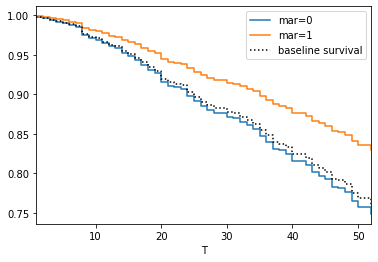

In [58]:
cph.plot_covariate_groups('mar', [0, 1])

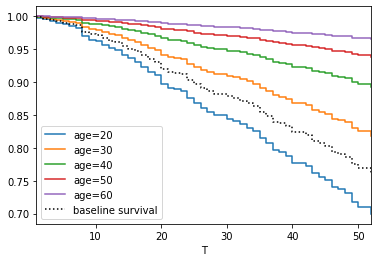

In [56]:
cph.plot_covariate_groups('age', [20, 30, 40, 50, 60])

### 위험비 사용 예시
- 인사팀: 어떤 사람이 퇴사하지 않고 오래 다니는지
- 공장: 누가 다루고, 어떻게 다루면 기계 고장 안나는지